In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 100

## 1. Data Overview

In [22]:
data = pd.read_csv('TVdata.txt')

In [23]:
data.head(5)

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,import_id,release_year,genres,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,awards,mpaa,star_category
0,385504,307127.605608,1,3,lionsgate,2013,"Action,Thriller,Drama",69614,15000000,42930462,6.5,112.301017,51,other award,PG-13,1.710000
1,300175,270338.426375,1,3,lionsgate,2013,"Comedy,Crime,Thriller",46705,15000000,3301046,6.5,94.983250,41,no award,R,3.250000
2,361899,256165.867446,1,3,other,2012,"Crime,Drama",197596,26000000,37397291,7.3,115.763675,58,other award,R,2.646667
3,308314,196622.720996,3,4,lionsgate,2008,"Thriller,Drama,War,Documentary,Mystery,Action",356339,15000000,15700000,7.6,130.703583,94,Oscar,R,1.666667
4,307201,159841.652064,1,3,lionsgate,2013,"Crime,Thriller,Mystery,Documentary",46720,27220000,8551228,6.4,105.545533,37,other award,R,3.066667


In [40]:
print("The dataset contains {0} rows and {1} columns".format( data.shape[0], data.shape[1]))

The dataset contains 4226 rows and 16 columns


### 1.1 Check if there is duplicated data

In [24]:
any(data.duplicated('video_id'))

False

In [25]:
data.columns

Index(['video_id', 'cvt_per_day', 'weighted_categorical_position',
       'weighted_horizontal_poition', 'import_id', 'release_year', 'genres',
       'imdb_votes', 'budget', 'boxoffice', 'imdb_rating', 'duration_in_mins',
       'metacritic_score', 'awards', 'mpaa', 'star_category'],
      dtype='object')

In [28]:
data.drop('video_id',axis=1).describe(percentiles=[0.1,0.25,0.5,0.75,0.9,1.0])

,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,release_year,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category
count,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4.226000e+03,4.226000e+03,4226.000000,4226.000000,4226.000000,4226.000000
mean,4218.630239,7.782537,28.103644,2001.056791,6462.924042,2.150743e+06,2.536338e+06,5.257099,89.556123,15.973734,0.954651
std,13036.079964,6.134183,11.863649,17.496849,31596.006790,7.176604e+06,8.243516e+06,2.122810,21.086183,26.205217,0.955045
min,2.187625,1.000000,1.000000,1916.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,4.037250,0.000000,0.000000
10%,141.984913,3.000000,13.000000,1974.000000,8.000000,0.000000e+00,0.000000e+00,2.300000,62.390781,0.000000,0.000000
25%,351.168776,4.000000,20.000000,1998.000000,81.000000,0.000000e+00,0.000000e+00,4.300000,82.601712,0.000000,0.000000
50%,1193.499989,6.000000,28.000000,2008.000000,535.000000,0.000000e+00,0.000000e+00,5.800000,90.730308,0.000000,1.000000
75%,3356.788816,9.000000,36.000000,2012.000000,3053.000000,1.500000e+06,0.000000e+00,6.800000,99.500312,41.000000,1.666667
90%,7930.121453,15.000000,44.000000,2014.000000,12180.500000,5.000000e+06,8.551228e+06,7.500000,111.033917,57.000000,2.250000
100%,307127.605608,41.000000,70.000000,2017.000000,948630.000000,1.070000e+08,1.842088e+08,10.000000,246.016767,100.000000,4.000000


In [30]:
num_cols = ['cvt_per_day', 'weighted_categorical_position','weighted_horizontal_poition',\
           'release_year', 'imdb_votes', 'budget', 'boxoffice', 'imdb_rating', 'duration_in_mins',\
            'metacritic_score','star_category']
str_cols = ['import_id','genres', 'awards', 'mpaa']

### 1.2 Distribution of numerical columns

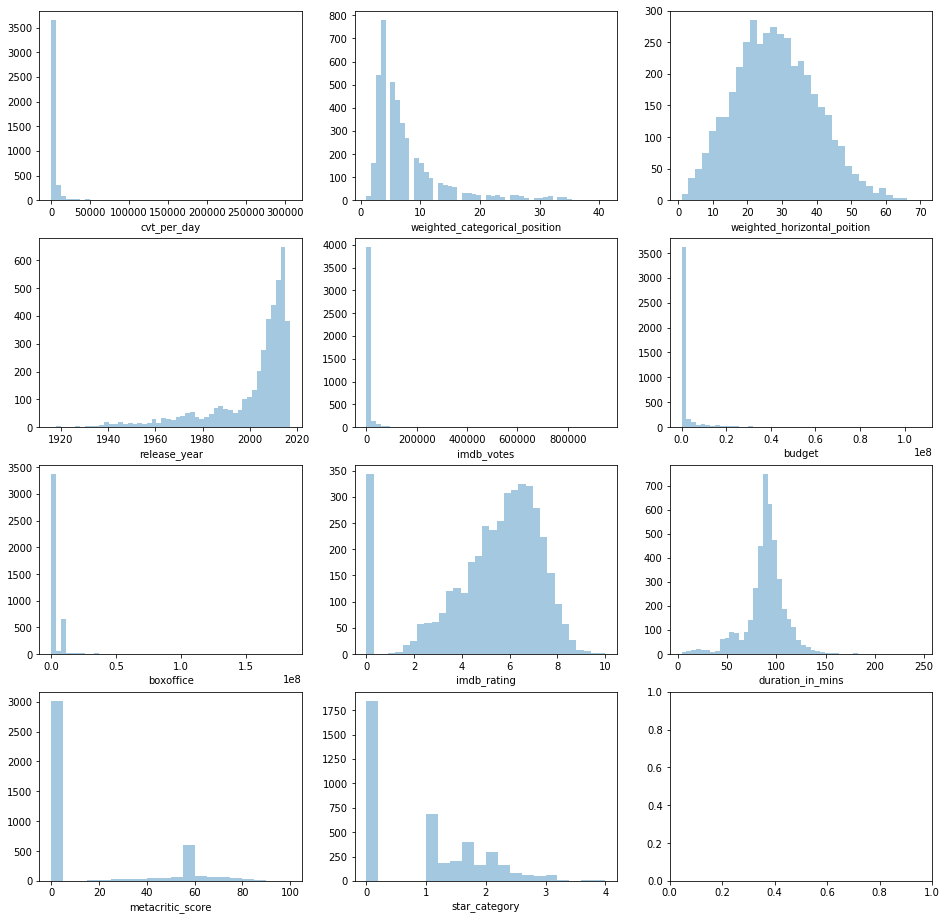

In [31]:
fig, ax = plt.subplots(nrows=4,ncols=3, figsize=(16,16))
for i in range(len(num_cols)):
    col = num_cols[i]
    sns.distplot(data[col], kde= False, ax = ax[i//3][i%3])    

### 1.3 Finer plot of 'cvt_perday'

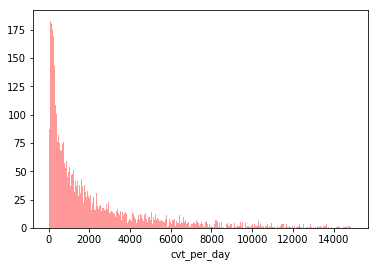

In [35]:
sns.distplot(data['cvt_per_day'], kde= False, bins = range(0,15000,50), color='red') 

### 1.3 Correlations

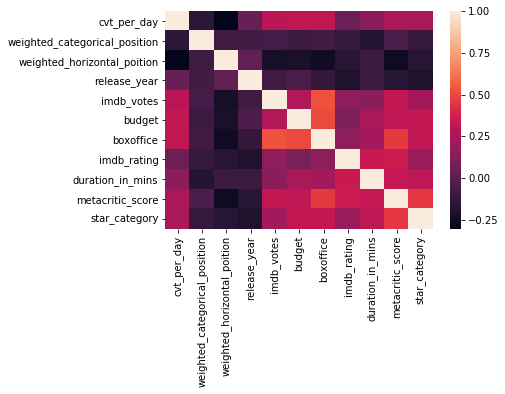

In [36]:
sns.heatmap(data[num_cols].corr())

### 1.4 Zero counts

In [44]:
(data == 0).sum()

video_id                            0
cvt_per_day                         0
weighted_categorical_position       0
weighted_horizontal_poition         0
import_id                           0
release_year                        0
genres                              0
imdb_votes                        344
budget                           2454
boxoffice                        3194
imdb_rating                       344
duration_in_mins                    0
metacritic_score                 3012
awards                              0
mpaa                                0
star_category                    1846
dtype: int64

In [ ]:
# df = data[(data != 0).all(1)]
# sns.heatmap(df[num_cols].corr())

In [ ]:
# fig, ax = plt.subplots(nrows=4,ncols=3, figsize=(12,14))
# for i in range(len(num_cols)):
#     col = num_cols[i]
#     sns.distplot(df[col], kde= False, ax = ax[i//3][i%3])  

### 1.5 Categorical columns

other        2963
lionsgate     677
mgm           445
paramount     141
Name: import_id, dtype: int64


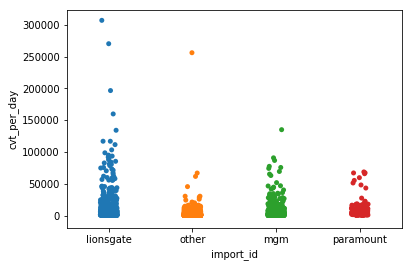

In [47]:
print(data['import_id'].value_counts())
sns.stripplot(x="import_id", y="cvt_per_day", data=data, jitter=True)

no award        2569
other award     1453
Oscar            141
Golden Globe      44
BAFTA             19
Name: awards, dtype: int64


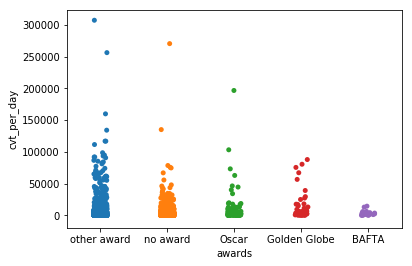

In [49]:
print(data['awards'].value_counts())
sns.stripplot(x="awards", y="cvt_per_day", data=data, jitter=True)

NotRated    2158
R           1158
PG-13        426
PG           353
G            125
NC-17          6
Name: mpaa, dtype: int64


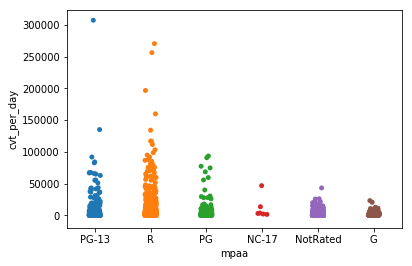

In [51]:
print(data['mpaa'].value_counts())
sns.stripplot(x="mpaa", y="cvt_per_day", data=data, jitter=True)

In [ ]:
genres = list(set([g for v in data['genres'].str.split(',').values for g in v]))
genres

In [ ]:
data = pd.get_dummies(data, columns = ['import_id', 'awards', 'mpaa'])

In [ ]:
data.head(5)

In [ ]:
df = data.drop('genres',axis=1)

In [ ]:
df.head(5)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
regr = RandomForestRegressor(max_depth=5, random_state=0,
                             n_estimators=100)

In [ ]:
y = df['cvt_per_day']
X = df.drop('cvt_per_day',axis=1)

In [ ]:
regr.fit(X, y)

In [ ]:
print(regr.feature_importances_)